# Anomaly detection（异常检测）

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pandas as pd

## 作业一

第一个任务是使用高斯模型来检测某个样例是否异常，是一个简单的二维数据集

In [3]:
data = loadmat('data/ex8data1.mat')
print(data.keys())
X = data['X']
X.shape

dict_keys(['__header__', '__version__', '__globals__', 'X', 'Xval', 'yval'])


(307, 2)

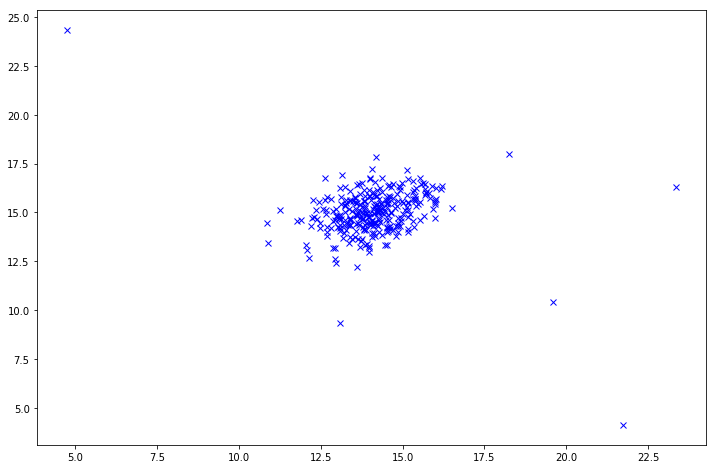

In [4]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(X[:,0], X[:,1],'bx')
plt.show()

从data中读取验证数据，其中Xval表示数据的两个特征，yval为label表示该数据是否正常，若异常则y=1，否则y=0

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 1 1 1 1 1]
(307, 2) (307,)
(array([  9,  49, 300, 301, 302, 303, 304, 305, 306], dtype=int64),)


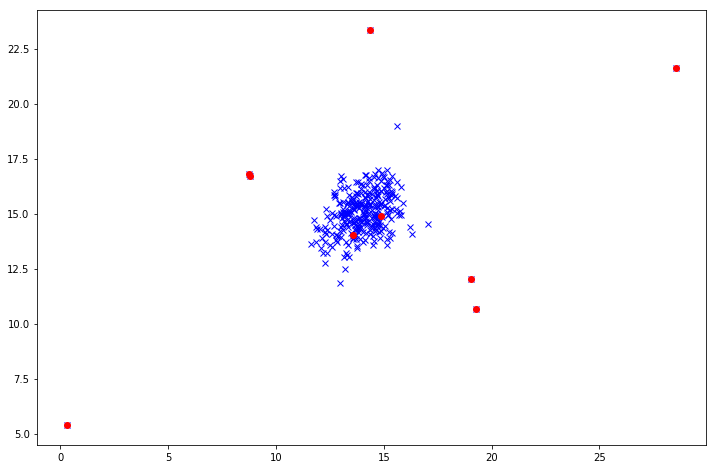

In [5]:
Xval = data['Xval']
yval = np.squeeze(data['yval'])
print(yval)
print(Xval.shape, yval.shape)
print(np.where(yval==1))
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(Xval[:,0], Xval[:,1],'bx')
ax.plot(Xval[np.where(yval==1),0],Xval[np.where(yval==1),1],'ro')
plt.show()

可以看到有几个样本明显偏离，是异常值。           
现在我们建立一个可以返回均值和方差的函数，求得高斯模型参数。

In [6]:
def estimate_guassian(X):
    mu = np.mean(X,axis=0)
    sigma = np.var(X,axis=0)
    return mu,sigma
mu,sigma = estimate_guassian(X)
mu,sigma

(array([14.11222578, 14.99771051]), array([1.83263141, 1.70974533]))

利用之前算好的参数使用高斯模型进行检测，scipy中的states可以提供这种方法。

In [7]:
from scipy import stats
guassian_model = stats.norm(mu, sigma)
pval = guassian_model.pdf(Xval)
pval= pval[:,0]*pval[:,1]
print(pval.shape)

(307,)


在得到pval后，下一步确定epsilon值。使用不同的epsilon值来计算f1值,最后取最大的f1所对应的epsilon

In [8]:
def select_threshold(pval,yval):
    epsilon = np.linspace(np.min(pval),np.max(pval),num=10000)
    f1 = []
    for e in epsilon:
        y_pred = (pval<=e).astype(int)
        
        TP = np.sum(np.logical_and(y_pred==1,yval==1).astype(float))
        FP = np.sum(np.logical_and(y_pred==1,yval==0).astype(float))
        FN = np.sum(np.logical_and(y_pred==0,yval==1).astype(float))
        
        precision = TP / (TP + FP)
        recall = TP / (TP + FN)
        f1_score = (2 * precision * recall) / (precision + recall)
        f1.append(f1_score)
    
    argmax_f1 = np.argmax(f1)
    
    return epsilon[argmax_f1],f1[argmax_f1]
epsilon, f1_score = select_threshold(pval, yval)
epsilon, f1_score

(0.0004521033146993593, 0.8750000000000001)

使用上面求的epsilon进行预测

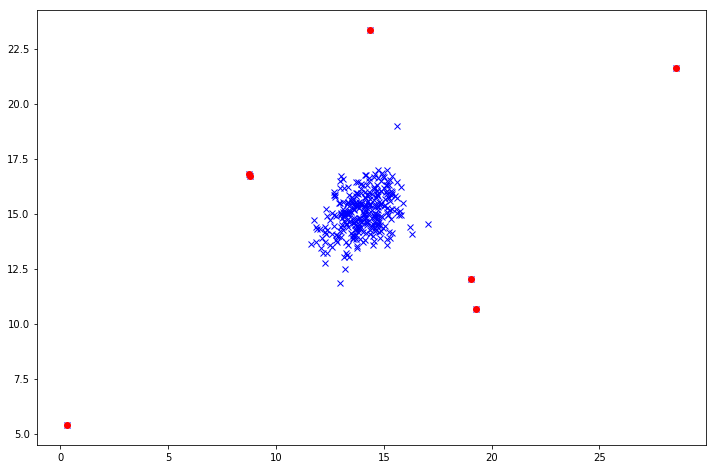

In [16]:
y_pred = np.where(pval<epsilon)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(Xval[:,0], Xval[:,1],'bx')
ax.plot(Xval[y_pred[0],0], Xval[y_pred[0],1], 'ro')
plt.show()

## 作业二
高维数据的异常检测

In [55]:
data2 = loadmat('./data/ex8data2.mat')
X2 = data2['X']
X2val = data2['Xval']
y2val = data2['yval']
print(X2.shape,X2val.shape,y2val.shape)

(1000, 11) (100, 11) (100, 1)


求均值及协方差矩阵，并求X2val对应p值

In [56]:
mu = np.mean(X2,axis=0)
cov = np.cov(X2.T)
multi_normal = stats.multivariate_normal(mu, cov)
p2val = multi_normal.pdf(X2val)
print(mu.shape,cov.shape,y2val.shape,p2val.shape)

(11,) (11, 11) (100, 1) (100,)


In [57]:
epsilon2, f1_score2 = select_threshold(p2val, np.squeeze(y2val))
epsilon2, f1_score2

(1.74667432759803e-19, 0.7368421052631577)

In [58]:
y_pred = (pval<epsilon2).astype(int)
num = np.sum(y_pred)
num

1